### Project 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from scipy import stats
from scipy.stats import norm

#### Lecture 1

In [2]:
class LGM:
    def __init__(self,seed = 12, m = 2**31-1, a = 7**5, b = 0):
        self.seed = seed
        self.state = seed
        self.m = m
        self.a = a
        self.b = b
    # Generate random number
    def gen(self):
        self.state = (self.a * self.state + self.b) % self.m
        return self.state
    # Generate uniform
    def gen_uni(self):
        self.state = (self.a * self.state + self.b) % self.m
        return self.state/self.m
    def gen_uni_list(self, size):
        rv_list = [0]*size
        for i in range(size):
            rv_list[i] = self.gen_uni()
        return rv_list

In [3]:
RV = LGM(seed = 33333)
RV_1 = RV.gen_uni_list(44)
RV_1



[0.2608763665244339,
 0.5490921761603524,
 0.5922047270425618,
 0.18484740433508876,
 0.7303246598366298,
 0.5665578742355843,
 0.13819227746603652,
 0.5976073716755991,
 0.9870957517936341,
 0.11830039560715687,
 0.2747489694854007,
 0.7059301411294985,
 0.567881963480209,
 0.39216021187238403,
 0.03668093915874182,
 0.4965444409738036,
 0.4224194467172117,
 0.6036409761773613,
 0.39388661291165583,
 0.0523032061999213,
 0.059986602077254376,
 0.19482111241427302,
 0.35843634668664837,
 0.23967876249909342,
 0.2809613222633308,
 0.11694327980137582,
 0.4657036217235511,
 0.08077030772379148,
 0.5065619137634346,
 0.786084622045087,
 0.7242427117769805,
 0.34725683571177385,
 0.34563780778350206,
 0.13463541731919879,
 0.8174588837742148,
 0.03145959322874416,
 0.7413833955029879,
 0.430728218718771,
 0.24917200638408402,
 0.8339112972998578,
 0.5471737187109765,
 0.34869037538240216,
 0.43913905203302345,
 0.610047519025415]

#### Question 1 (a)

In [7]:
def bernoulli(n,p,seed):
    # Generate random number
    RV = LGM(seed)
    RV_list = RV.gen_uni_list(n)
    
    size = len(RV_list)
    return_list = [0]*size
    
    for i in range(size):
        if RV_list[i]<p:
            return_list[i] = 1
    return return_list


In [8]:
def binomial (n,p,seed,size = 1000):
    RV_list = bernoulli(n*size,p,seed)
    result = [None]*size
    for i in range(size):
        temp = 0
        for j in range(n):
             temp +=RV_list[i*n+j]   
        result[i] = temp
    return result

#binomial(44,0.64,33,)




Test for P(X>=35)

In [9]:
result  = binomial(44,0.64,33,)
cnt = 0
for i in result:
    if i >=35:
        cnt+=1
cnt/1000
# the correct answer should be 0.02

0.018

#### Question 1 (b)

In [17]:
lam = 1.5

def Expo(lam,seed = 12, size = 10000):
    
    RV = LGM(seed)
    RV_list = np.array(RV.gen_uni_list(size))
    result = -lam*np.log(1-RV_list)
    return result

result = Expo(lam,666,)

P(X>=1)

In [18]:
cnt = 0
for i in result:
    if i >=1:
        cnt+=1
cnt/10000

0.5188

P(X>=4)

In [19]:
cnt = 0
for i in result:
    if i >=4:
        cnt+=1
cnt/10000

0.0686

Mean and Sd

In [20]:
np.mean(result)

1.5093717965417843

In [21]:
np.std(result)

1.505013179076578

Histgram

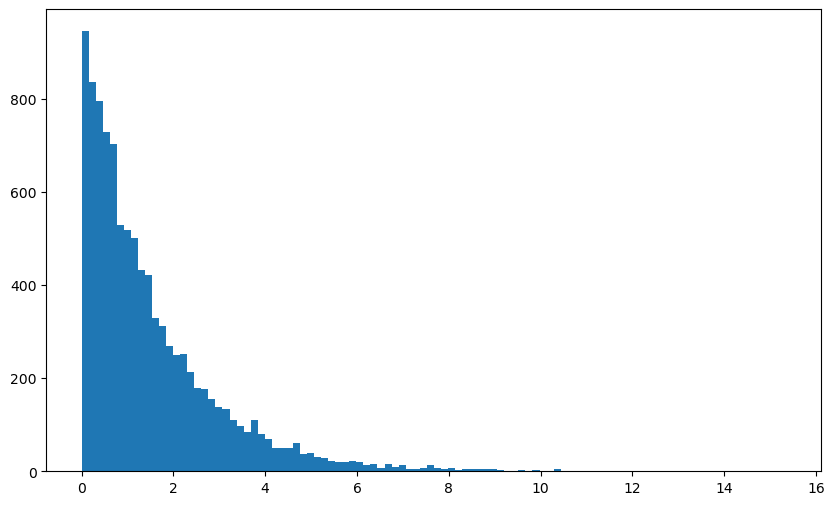

In [22]:
plt.figure(figsize = (10,6))
plt.hist(result,bins=100)
plt.show()

#### Question 1 (c)

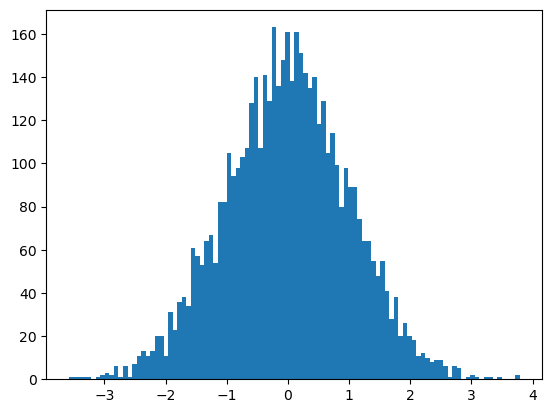

In [23]:
def Box_muller(mean = 0, sigma = 1, seed = 12,size = 2,single = True):
    RV = LGM(seed)
    RV_list = np.array(RV.gen_uni_list(size))
    mid = int(size/2)
    U_1 = RV_list[:mid]
    U_2 = RV_list[mid:]
    Z_1 = np.sqrt(-2*np.log(U_1))*np.cos(2*np.pi*U_2)
    Z_2 = np.sqrt(-2*np.log(U_1))*np.sin(2*np.pi*U_2)
    result = np.concatenate((Z_1,Z_2))
    if single:
        return result[0]
    
    return result

result = Box_muller(size = 5000,single=False)

plt.hist(result, bins=100)
plt.show()
    
    

#### Question 1 (d)

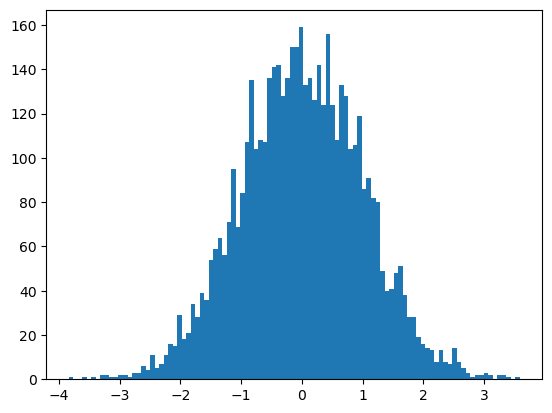

In [116]:
def Polar_marsaglia(mean = 0, sigma = 1, seed = 12,size = 5000):
    RV = LGM(seed)
    if size%2!=0:
        print('Require an even size')
    mid = int(size/2)
    result = [None]*size
    
    cnt = 0
    while cnt<mid:
        U_1 = RV.gen_uni()
        U_2 = RV.gen_uni()
        
        V_1 = 2*U_1-1
        V_2 = 2*U_2-1
        
        W = V_1**2+V_2**2
        
        if W>1:
            continue
        
        Z_1 = V_1*np.sqrt(-2*np.log(W)/W)
        Z_2 = V_2*np.sqrt(-2*np.log(W)/W)
        
        result[cnt] = Z_1
        result[mid+cnt] = Z_2   
        cnt+=1

    return result

result = Polar_marsaglia()
plt.hist(result, bins=100)
plt.show()

#### Qustion 1 (e)

time for Box Muller

In [112]:
start = time.time()
result = Box_muller(size = 500000)
end = time.time()

end-start


0.18718409538269043

time for Polar_Marsaglia

In [113]:
start = time.time()
result = Polar_marsaglia(size = 500000)
end = time.time()

end-start


1.133293628692627

Obvious when size is large, Bos Muller method is faster
The reason is that Polar_Marsaglia require a W<1, so some if the simulations are wasted. 
However, it does not requires cos an sin, which costs a lot of  coomputation forces


#### Lecture 2

Question 2 (a)

A(t)

In [24]:
t = 1
N = 10000


result = [None]*N
for i in range(N):
    # W_t ~N(0,sqrt(t))
    W = np.random.normal(loc=0, scale=np.sqrt(t))
    A_t = W**2+np.sin(W)
    result[i] = A_t
    
np.mean(result)

1.015949710465305

In [25]:
t = 3
N = 10000


result = [None]*N
for i in range(N):
    # W_t ~N(0,sqrt(t))
    W = np.random.normal(loc=0, scale=np.sqrt(t))
    A_t = W**2+np.sin(W)
    result[i] = A_t
    
np.mean(result)

2.992073794848977

In [40]:
t = 5
N = 10000


result = [None]*N
for i in range(N):
    # W_t ~N(0,sqrt(t))
    W = np.random.normal(loc=0, scale=np.sqrt(t))
    A_t = W**2+np.sin(W)
    result[i] = A_t
    
np.mean(result)
        
        

5.062578022488743

B(t)

In [51]:
t = 1
N = 1000000

result = [None]*N
for i in range(N):
    B_t = 0
    # W_1 ~N(0,1)
    W = np.random.normal(loc=0, scale=np.sqrt(t))
    B_t = np.exp(t/2)*np.cos(W)
    result[i] = B_t
    
np.mean(result)



1.0018394881878556

In [26]:
t = 3
N = 1000000

result = [None]*N
for i in range(N):
    B_t = 0
    # W_1 ~N(0,1)
    W = np.random.normal(loc=0, scale=np.sqrt(t))
    B_t = np.exp(t/2)*np.cos(W)
    result[i] = B_t
    
np.mean(result)


0.9974343192542969

In [27]:
t = 5
N = 1000000

result = [None]*N
for i in range(N):
    B_t = 0
    # W_1 ~N(0,1)
    W = np.random.normal(loc=0, scale=np.sqrt(t))
    B_t = np.exp(t/2)*np.cos(W)
    result[i] = B_t
    
np.mean(result)


0.9992499913184342

In [43]:
# Calculate the CI of result

mean = np.mean(result)
std = np.std(result,ddof = 1)
mean_std = std/np.sqrt(len(result))

upper = mean+1.96*mean_std
lower = mean-1.96*mean_std

print([lower,upper])
print("CI spread",upper-lower)

[0.9777012057042658, 1.0112306815610745]
CI spread 0.033529475856808766


#### Question 2 (b)
as t goes up,  the value of B(t) stays around 1  since the exponential part and the cos part cancels each other

#### Question 2 (c)

Use Antithetic Variates here

In [48]:
t = 5
N = 1000000

result = [None]*N
for i in range(N):
    B_t = 0
    # W_1 ~N(0,1)
    W = np.random.normal(loc=0, scale=np.sqrt(t))
    W_i = -W
    temp_1 = np.exp(t/2)*np.cos(W)
    temp_2 = np.exp(t/2)*np.cos(W_i)
    
    B_t = (temp_1+temp_2)/2
        
    result[i] = B_t
    
np.mean(result)

1.005907402114827

In [49]:
# Calculate the CI of result

mean = np.mean(result)
std = np.std(result,ddof = 1)
mean_std = std/np.sqrt(len(result))

upper = mean+1.96*mean_std
lower = mean-1.96*mean_std

print([lower,upper])
print("CI spread",upper-lower)

[0.9891379325614573, 1.0226768716681969]
CI spread 0.03353893910673955


There is almost no improvement. The reson might be: cos is an even function and therefore cos(W) and cos(-W) is the produce the same result.

#### Question 3 (a)

Monte Carlo

In [68]:
t = 5
N = 10000
S_0_init = 100
K = 100
r = 0.055
sigma = 0.2


result = [None]*N
for i in range(N):
    S_0 = S_0_init
    C = 0
    # W_1 ~N(0,1)
    W = np.random.normal(loc=0, scale=np.sqrt(t))
    
    S_T = S_0*np.exp(sigma*W+(r-sigma**2/2)*t)
    
    C_T =max(0,S_T-K)
    C_0 = np.exp(-r * t)*C_T

    result[i] = C_0
    
np.mean(result)

30.362004128460928

In [69]:
# Calculate the CI of result

mean = np.mean(result)
std = np.std(result,ddof = 1)
mean_std = std/np.sqrt(len(result))

upper = mean+1.96*mean_std
lower = mean-1.96*mean_std

print([lower,upper])
print("CI spread",upper-lower)

[29.551050500203438, 31.172957756718418]
CI spread 1.6219072565149801


#### Question 3 (b)

BS_Model

The result from BS Method is 30.373, which is close to the Monte Carlo result

#### Question 3 (c)

In [70]:
t = 5
N = 10000
S_0_init = 100
K = 100
r = 0.055
sigma = 0.2


result = [None]*N
for i in range(N):
    S_0 = S_0_init
    C = 0
    # W_1 ~N(0,1)
    W = np.random.normal(loc=0, scale=np.sqrt(t))
    W_i = -W
    
    S_T_1 = S_0*np.exp(sigma*W+(r-sigma**2/2)*t)
    S_T_2 = S_0*np.exp(sigma*W_i+(r-sigma**2/2)*t)
    
    C_0_1 =np.exp(-r * t)*max(0,S_T_1-K)
    C_0_2 =np.exp(-r * t)*max(0,S_T_2-K)
    
    C_0 = (C_0_1+C_0_2)/2

    result[i] = C_0
    
np.mean(result)

30.311544552764715

In [71]:
# Calculate the CI of result

mean = np.mean(result)
std = np.std(result,ddof = 1)
mean_std = std/np.sqrt(len(result))

upper = mean+1.96*mean_std
lower = mean-1.96*mean_std

print([lower,upper])
print("CI spread",upper-lower)

[29.912028525124427, 30.711060580405004]
CI spread 0.799032055280577


By taking same amount of simulation, the variance of result is smaller when using antithetic variets

#### Question 4 (a)

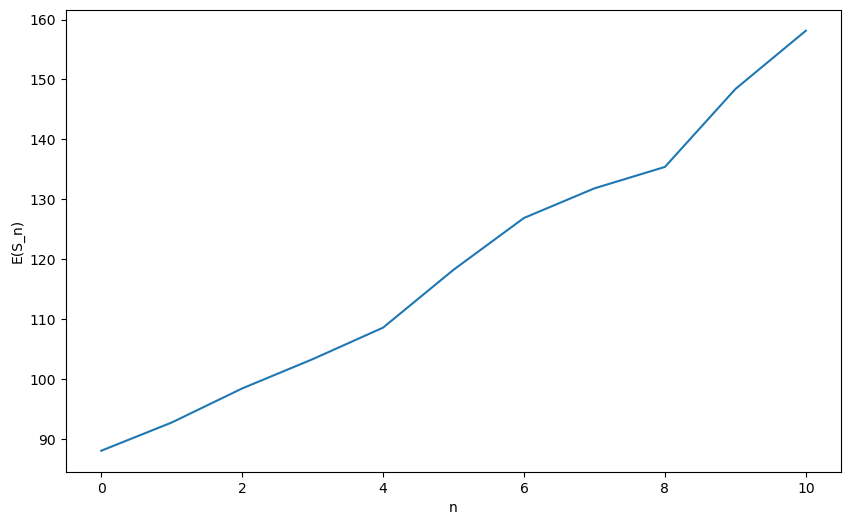

In [111]:
t_max = 11
N = 1000
S_0_init = 88
K = 100
r = 0.055
sigma = 0.2

result = [None]*t_max

for t in range(t_max):
    S_i = [None]*N
    for i in range(N):
          
        S_0 = S_0_init
        C = 0
        # W_1 ~N(0,1)
        W = np.random.normal(loc=0, scale=np.sqrt(t)) 
        S_T = S_0*np.exp(sigma*W+(r-sigma**2/2)*t)
        S_i[i] = S_T
    result[t] = np.mean(S_i)

plt.figure(figsize = (10,6))
plt.plot(np.arange(0,11),result)  
plt.xlabel("n")
plt.ylabel("E(S_n)")
plt.show()      
        

#### Question 4 (b)

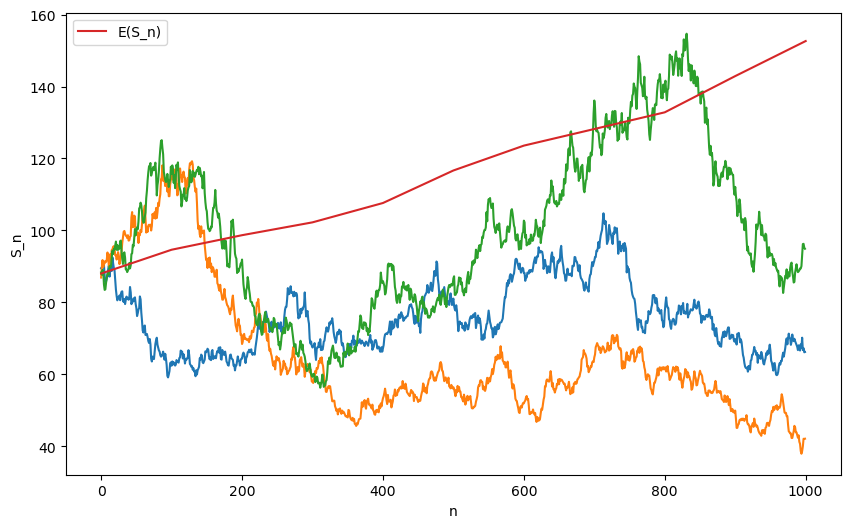

In [110]:
i_max = 3
t_max = 10
N = 1000
S_0_init = 88
K = 100
r = 0.055
sigma = 0.2

result_2 = [None]*i_max

for i in range(i_max):
    S_i = [None]*N
    S_0 = S_0_init
    for j in range(1000):
        dt = 1/100
        
        dW = np.random.normal(loc=0, scale=np.sqrt(dt)) 
        dS_0 = S_0*(r*dt+sigma*dW)
        S_0 = S_0+dS_0
        
        S_i[j] = S_0
    result_2[i] = S_i
    
result_2 = np.array(result_2)

    
plt.figure(figsize = (10,6))
plt.plot(result_2.T)  
plt.plot(np.arange(0,1100,100),result,label = "E(S_n)")
plt.legend() 
plt.xlabel("n")
plt.ylabel("S_n")
plt.show()      

#### Question 4 (d)

After we changeing the sigma from 0.2 to 0.3, the E_(S_n) curve doex not chhange much , however, for the 3 simulated curve, the paths are more extreme. The highest path reached 500 while the hiighest is merely 160 when sigma is 0.2

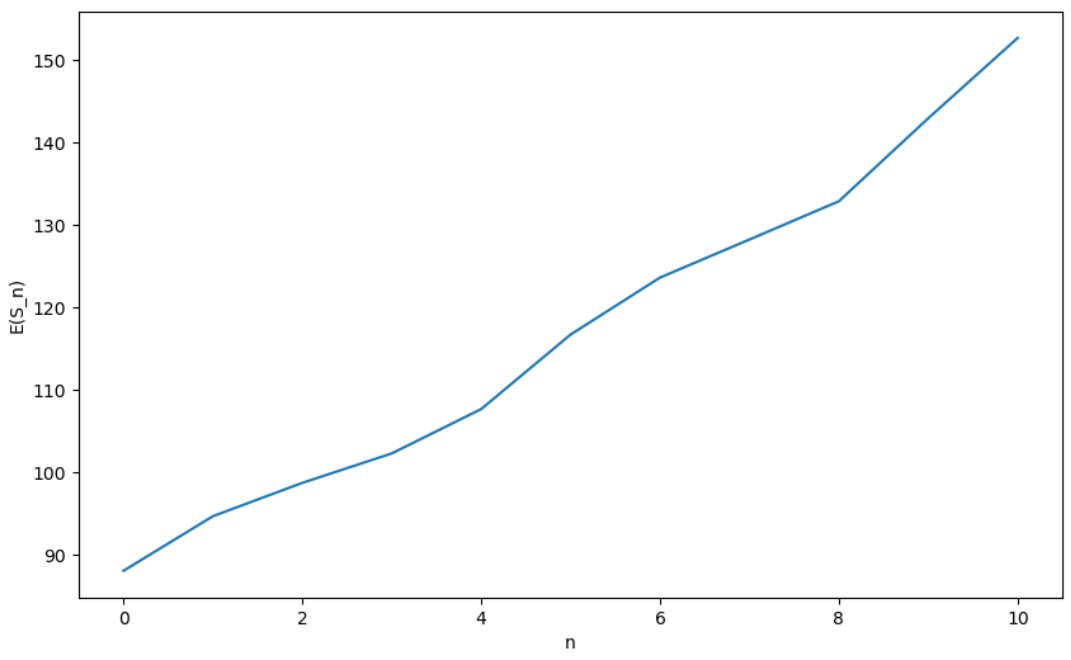

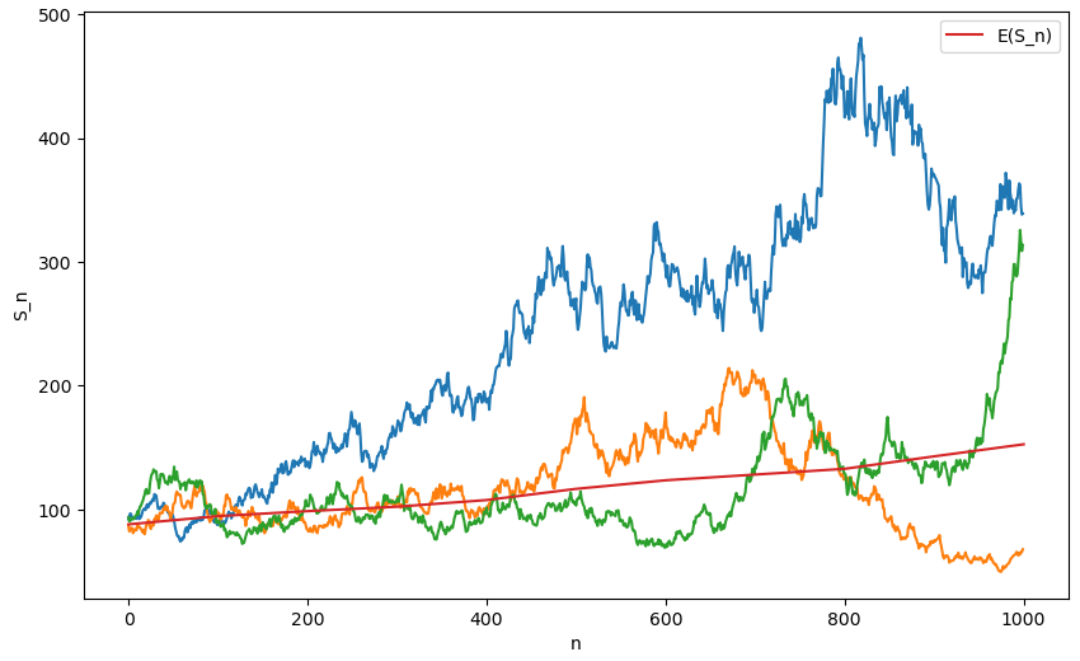

#### Lecture 3

#### Question 5 (a)

$$dS = S\mu dt+S\sigma dW$$
Using Euler's scheme:
$$S_{t_{k+1}}-S_{t_k} = S_{t_k}\mu dt + S_{t_k}\sigma dW $$

In [78]:
def Eu_Call_Euler(S_0_init,T,r,sigma,K,N_path = 100000,N_simu = 100):
    data = np.zeros((N_path,N_simu))
    data[:,0] = S_0_init
    
    dt = T/N_simu
    for i in range(1,N_simu):
        Z = np.array(np.random.normal(0,1,size=N_path)).T
        
        dS = data[:,i-1]*r*dt + data[:,i-1]*sigma*np.sqrt(dt)*Z
        data[:,i] = data[:,i-1] + dS
    C_0 = np.exp(-r*T)*np.maximum(data[:,-1]-K,0)
    mean = np.mean(C_0)
    std = np.std(C_0,ddof = 1)/np.sqrt(N_path)
    return [mean,std]

Eu_Call_Euler(100,5,0.02,0.2,100)

[21.9290466502162, 0.11662062532989088]

#### Question 5 (b)

In [81]:
def Eu_Call_Milshtein(S_0_init,T,r,sigma,K,N_path = 100000,N_simu = 100):
    
    data = np.zeros((N_path,N_simu))
    data[:,0] = S_0_init
    
    dt = T/N_simu
    for i in range(1,N_simu):
        Z = np.random.normal(0,1,size=N_path)
        
        dS = r*data[:,i-1]*dt+sigma*data[:,i-1]*np.sqrt(dt) * Z+0.5*sigma**2*data[:,i-1]*dt*(Z**2-1)
        data[:,i] = data[:,i-1]+dS
    C_0 = np.exp(-r*T)*np.maximum(data[:,-1]-K,0)
    mean = np.mean(C_0)
    std = np.std(C_0,ddof = 1)/np.sqrt(N_path)
    return [mean,std]


Eu_Call_Milshtein(100,5,0.02,0.2,100)

[21.857251787673984, 0.11651239356635569]

#### Question 5 (c)

In [125]:
def cdf(x):
    d1 = 0.0498673470
    d2 = 0.0211410061
    d3 = 0.0032776263
    d4 = 0.0000380036
    d5 = 0.0000488906
    d6 = 0.0000053830

    if x>=0:
        val = 1-0.5*np.power((1+d1*x+d2*x**2+d3*x**3+d4*x**4+d5*x**5+d6*x**6),-16)
        return val
    else:
        return 1-cdf(-x)

0.5

In [126]:
def d1_2(d1_2, S, K, r, y, T, t, sigma):
    
    value1 = (math.log(S/K)+(r-y)*(T-t))/(sigma*math.sqrt(T-t))
    
    value2 = 0
    if d1_2 == "d2":
        value2 = -1
    else:
        value2 = 1
    value3 = sigma*math.sqrt(T-t)*0.5
    return value1+value2*value3


def BS(T,t,r,y,sigma,S,K):
    fi = 1
    temp = S*math.exp(-y*(T-t))*cdf(fi*d1_2("d1", S, K, r, y, T, t, sigma))-K*math.exp(-r*(T-t))*cdf(fi*d1_2("d2", S, K, r, y, T, t, sigma))
    price = temp*fi
    # delta = math.exp(-y*(T-t))*norm.cdf(d1_2("d1", S, K, r, y, T, t, sigma),0,1)
    # gamma = math.exp(-y*(T-t))*norm.pdf(d1_2("d1", S, K, r, y, T, t, sigma))/(S*sigma*(T-t))
    return price

BS(5,0,0.02,0,0.2,100,100)

22.0220984899618

#### Question 5 (d)

In [120]:
result_EU = [None]*11
result_MI = [None]*11
result_BS = [None]*11
for i in range(0,11):

    result_EU[i] = Eu_Call_Euler(i+95,0.5,0.055,0.25,100)[0]
    result_MI[i] = Eu_Call_Milshtein(i+95,0.5,0.055,0.25,100)[0]
    result_BS[i] = BS(0.5,0,0.055,0,0.25,i+95,100)

   


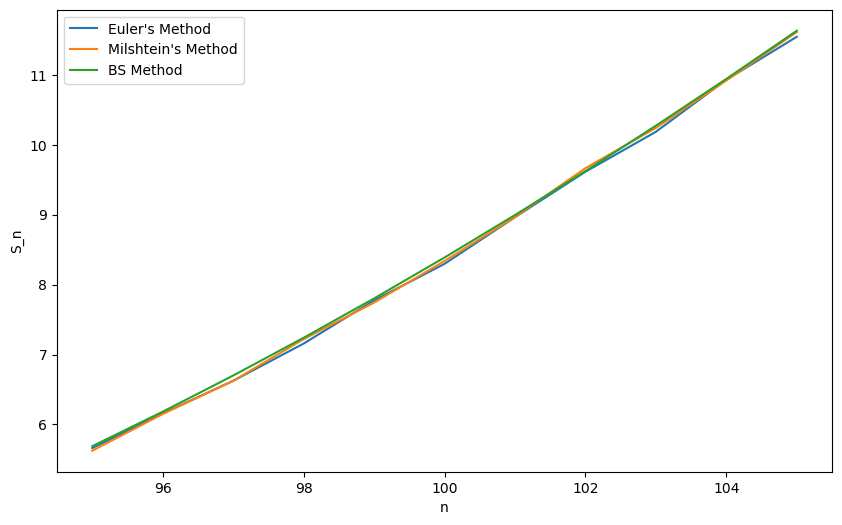

In [121]:
plt.figure(figsize = (10,6))
plt.plot(np.arange(95,106),result_EU,label = "Euler's Method")
plt.plot(np.arange(95,106),result_MI,label = "Milshtein's Method")
plt.plot(np.arange(95,106),result_BS,label = "BS Method")

plt.legend() 
plt.xlabel("n")
plt.ylabel("S_n")
plt.show()   

Three method will generate similar results

in the specific example the Euler's method is faster with almost the same accuracy. While generally seaking therodically the Milshtein's method converges faster in some cases 

#### Question 5 (e)

notice that 
$$\Gamma = \frac{C_1 - 2C_0 + C_2}{(\Delta S)^2}$$

In [115]:
def greeks(S_0_init,T,r,sigma,K):
    S_1 = S_0_init
    S_2 = S_0_init+1
    S_3 = S_0_init-1
    
    sigma_2 = sigma+0.1
    T_2 = T+0.1
    
    
    p1 =  Eu_Call_Euler(S_1,T,r,sigma,K,N_simu=100)[0]
    p2 =  Eu_Call_Euler(S_2,T,r,sigma,K,N_simu=100)[0]
    p3 =  Eu_Call_Euler(S_2,T,r,sigma,K,N_simu=100)[0]
    delta = (p2-p1)/1
    gamma = (p2-2*p1+p3)/1**2
    
    p4 = Eu_Call_Euler(S_1,T,r,sigma_2,K,N_simu=100)[0]
    vega = (p4-p1)/0.1
    
    p5 = Eu_Call_Euler(S_1,T_2,r,sigma,K,N_simu=100)[0]
    theta = (p5-p1)/0.1
    return[delta,gamma,theta,vega]

result_delta = [None]*11
result_gamma = [None]*11
result_theta = [None]*11
result_vega = [None]*11
for i in range(0,11):
    result_i = greeks(i+95,0.5,0.055,0.25,100)
    result_delta[i] = result_i[0]
    result_gamma[i] = result_i[1]
    result_theta[i] = result_i[2]
    result_vega[i] = result_i[3]
    
def greeks_BS(S_0_init,T,r,sigma,K):
    S_1 = S_0_init
    S_2 = S_0_init+1
    S_3 = S_0_init-1
    
    sigma_2 = sigma+0.1
    T_2 = T+0.1
    
    
    p1 =  BS(T,0,r,0,sigma,S_1,K)
    p2 =  BS(T,0,r,0,sigma,S_2,K)
    p3 =  BS(T,0,r,0,sigma,S_3,K)
    delta = (p2-p1)/1
    gamma = (p2-2*p1+p3)/1**2
    
    p4 = BS(T,0,r,0,sigma_2,S_1,K)
    vega = (p4-p1)/0.1
    
    p5 = BS(T_2,0,r,0,sigma,S_1,K)
    theta = (p5-p1)/0.1
    return[delta,gamma,theta,vega]
    
result_delta_BS = [None]*11
result_gamma_BS = [None]*11
result_theta_BS = [None]*11
result_vega_BS = [None]*11
for i in range(0,11):
    result_i = greeks_BS(i+95,0.5,0.055,0.25,100)
    result_delta_BS[i] = result_i[0]
    result_gamma_BS[i] = result_i[1]
    result_theta_BS[i] = result_i[2]
    result_vega_BS[i] = result_i[3]


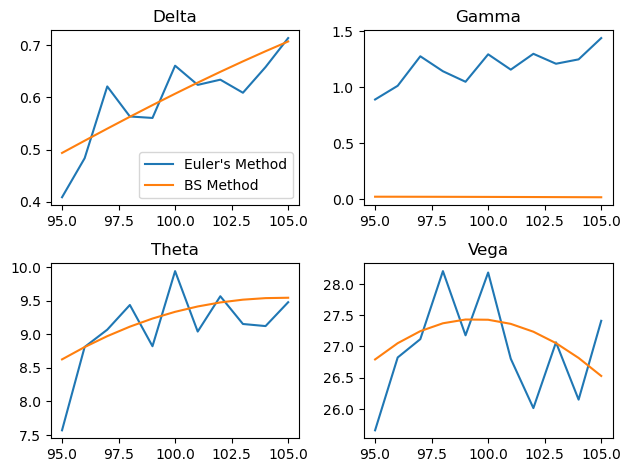

<Figure size 3000x3000 with 0 Axes>

In [116]:

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(np.arange(95,106),result_delta,label = "Euler's Method")
axs[0, 0].plot(np.arange(95,106),result_delta_BS,label = "BS Method")
axs[0, 0].legend()
axs[0, 0].set_title("Delta")

axs[0, 1].plot(np.arange(95,106),result_gamma)
axs[0, 1].plot(np.arange(95,106),result_gamma_BS)
# axs[0, 1].legend()
axs[0, 1].set_title("Gamma")

axs[1, 0].plot(np.arange(95,106),result_theta)
axs[1, 0].plot(np.arange(95,106),result_theta_BS)
# axs[1, 0].legend()
axs[1, 0].set_title("Theta")

axs[1, 1].plot(np.arange(95,106),result_vega)
axs[1, 1].plot(np.arange(95,106),result_vega_BS)
# axs[1, 1].legend()
axs[1, 1].set_title("Vega")
plt.figure(figsize = (30,30))
fig.tight_layout(pad=1)
plt.show()      
        

By comparing the result from the above plot, the estimation for delta, theta and vega is relative accurate using dt = 0.005 (larger than the default ot the accuracy will be vert low). 
As gamma is second derivstive, it is not accurate at all, implying that we need to use less dt or do more simulation for that 

#### Question 6

In [11]:
def cor_norm(rho, size):
    mean1 = 0
    mean2 = 0
    std1 = 1
    std2 = 1
    
    cov_matrix = [[std1**2, rho*std1*std2], [rho*std1*std2, std2**2]]
    samples = np.random.multivariate_normal([mean1, mean2], cov_matrix, size)
    return samples[:,0],samples[:,1]

In [12]:
def Heston(S_0,V_0,T,r,sigma_V,K,rho,alpha,beta,method,N_path = 10000,dt = 0.05):
    N_simu = int(T/dt)
    
    data_S = np.zeros((N_path,N_simu))
    data_V = np.zeros((N_path,N_simu))
    data_S[:,0] = S_0
    data_V[:,0] = V_0
    
    for i in range(1,N_simu):
        Z1,Z2 = cor_norm(rho,N_path)
        # get V
        # determine method
        if method =="Reflection":
            f1 = np.abs(data_V[:,i-1])
            f2 = np.abs(data_V[:,i-1])
            f3 = np.abs(data_V[:,i-1])
        elif method == "Partial":
            f1= data_V[:,i-1]
            f2 = data_V[:,i-1]
            f3 = np.maximum(data_V[:,i-1],0)
        else:
            f1 = data_V[:,i-1]
            f2 = np.maximum(data_V[:,i-1],0)
            f3 = np.maximum(data_V[:,i-1],0)

        dV = alpha*(beta-f2)*dt+sigma_V*np.sqrt(f3*dt)*Z2
        data_V[:,i] = f1+dV
        # now get S
        dS = data_S[:,i-1]*r*dt + data_S[:,i-1]*np.sqrt(f3*dt)*Z1
        data_S[:,i] = data_S[:,i-1] + dS
        
    C_0 = np.exp(-r*T)*np.maximum(data_S[:,-1]-K,0)
    mean = np.mean(C_0)
    #std = np.std(C_0,ddof = 1)/np.sqrt(N_path)
    #return [mean,std]
    return mean

C1 = Heston(100,0.05,5,0.055,0.42,100,-0.6,5.8,0.0625,"Reflection")
C2 = Heston(100,0.05,5,0.055,0.42,100,-0.6,5.8,0.0625,"Partial")
C3 = Heston(100,0.05,5,0.055,0.42,100,-0.6,5.8,0.0625,"Full")

print("Using Reflection Method: ",C1)
print("Using Partial Turncation Method: ",C2)
print("Using Full Turncation Method: ",C3)


Using Reflection Method:  32.49904822944675
Using Partial Turncation Method:  32.675623912367755
Using Full Turncation Method:  33.412809954055405


#### Question 7

In [29]:
# convert the halton function 
def get_halton(N, base):
    seq = np.zeros(N)
    num_bits = 1 + int(np.ceil(np.log(N) / np.log(base)))
    vet_base = 1/(base ** (np.arange(1, num_bits + 1)))
    work_vet = np.zeros(num_bits)
    for i in range(N):
        j = 0
        ok = False
        while not ok:
            work_vet[j] += 1
            if work_vet[j] < base:
                ok = True
            else:
                work_vet[j] = 0
                j += 1
        seq[i] = np.dot(work_vet, vet_base)
    
    return seq


In [28]:
def fun(x,y):
    a = np.cos(2*np.pi*y)
    val = np.exp(-x*y)*(np.sin(6*np.pi*x)+np.sign(a) * (np.abs(a)) ** (1 / 3))
    
    return val

In [30]:
N = 1000
seq1 = get_halton(N,2)
seq2 = get_halton(N,3)

result = np.array([None]*N**2)
cnt = 0
for i in seq1:
    for j in seq2:
        result[cnt] = fun(i,j)
        cnt+=1
final = np.sum(result)/N**2
final

    
                       


0.02661766427508241